In [1]:
import numpy as np
import pandas as pd
import os 
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier



In [2]:
RANDOM_SEED = 1319

In [3]:
upselling= pd.read_table('orange_small_train_upselling.labels', header = None).iloc[:, 0].astype('category')


In [4]:
upselling

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
49995   -1
49996   -1
49997   -1
49998   -1
49999    1
Name: 0, Length: 50000, dtype: category
Categories (2, int64): [-1, 1]

In [5]:
pd.Series(upselling).value_counts()

-1    46318
1      3682
Name: 0, dtype: int64

<AxesSubplot:>

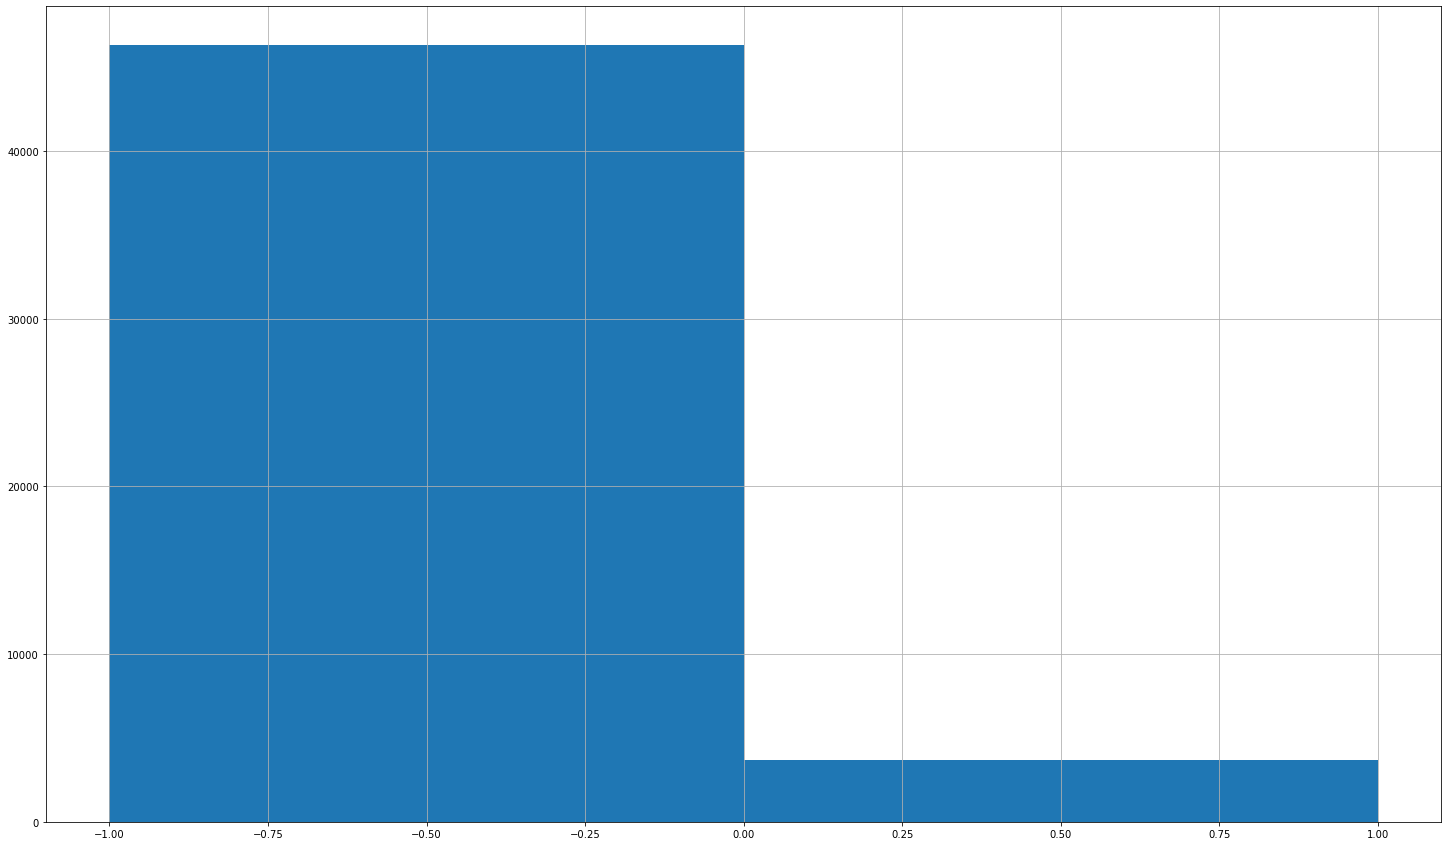

In [6]:
plt.figure(figsize=(25,15))
upselling.hist(bins=2)

In [7]:
upselling = upselling.cat.rename_categories([0, 1])


In [8]:
upselling

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    1
Name: 0, Length: 50000, dtype: category
Categories (2, int64): [0, 1]

In [9]:
churn = pd.read_table('orange_small_train_churn.labels', header = None).iloc[:, 0].astype('category')


In [10]:
churn

0       -1
1        1
2       -1
3       -1
4       -1
        ..
49995   -1
49996   -1
49997   -1
49998   -1
49999   -1
Name: 0, Length: 50000, dtype: category
Categories (2, int64): [-1, 1]

In [11]:
pd.Series(churn).value_counts()

-1    46328
1      3672
Name: 0, dtype: int64

<AxesSubplot:>

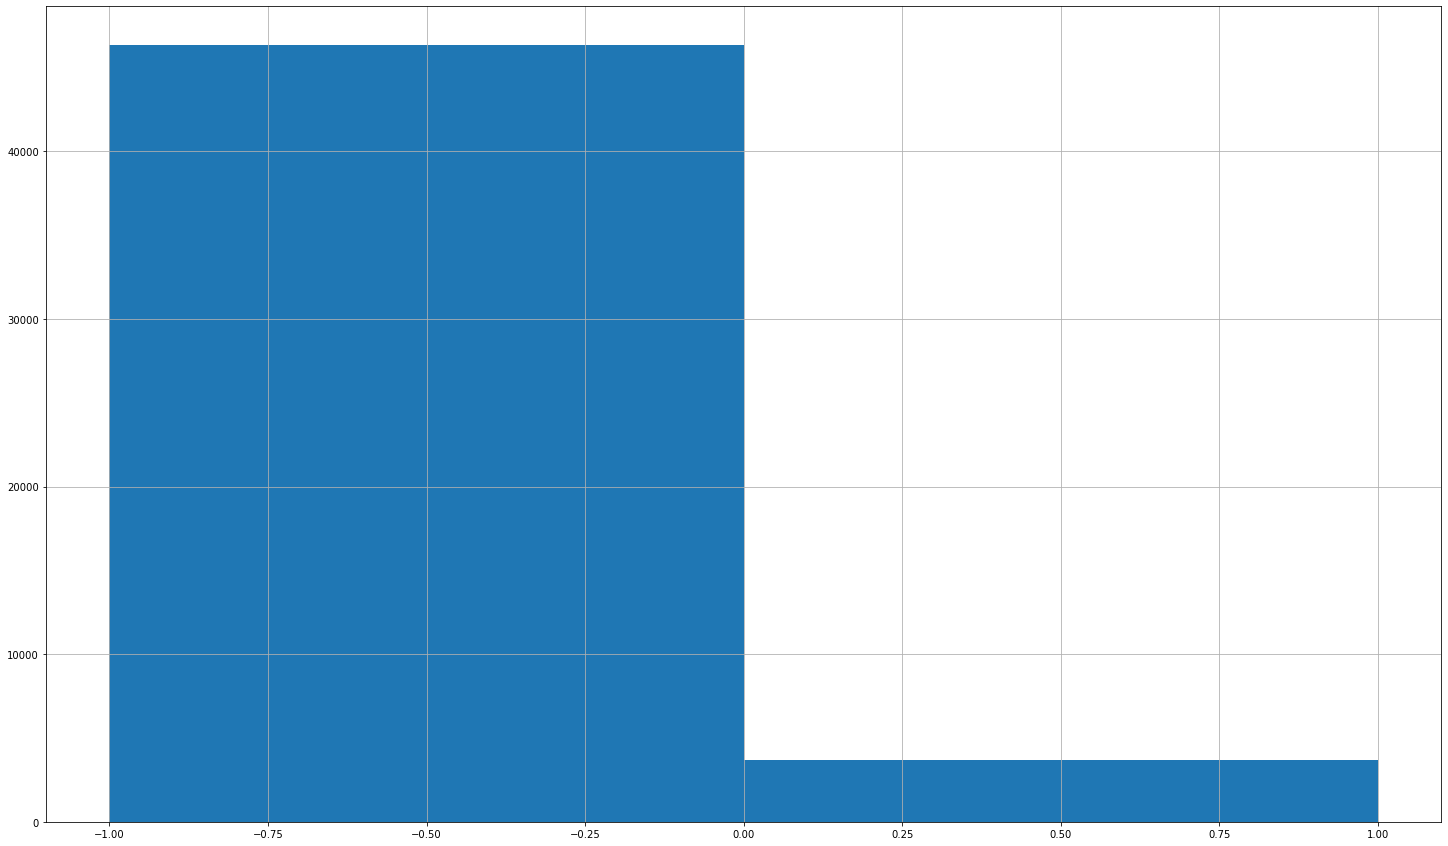

In [12]:
plt.figure(figsize=(25,15))
churn.hist(bins=2)

In [13]:
churn = churn.cat.rename_categories([0, 1])


In [14]:
churn

0        0
1        1
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: 0, Length: 50000, dtype: category
Categories (2, int64): [0, 1]

In [15]:
train = pd.read_table('orange_small_train.data')
train.head(10)


,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN
5,NaN,NaN,NaN,NaN,NaN,658.0,7.0,NaN,NaN,NaN,...,zCkv,QqVuch3,LM8l689qOp,NaN,NaN,Qcbd,02N6s8f,Zy3gnGM,am7c,NaN
6,NaN,NaN,NaN,NaN,NaN,1680.0,7.0,NaN,NaN,NaN,...,oslk,XlgxB9z,LM8l689qOp,NaN,kG3k,FSa2,RAYp,55YFVY9,am7c,NaN
7,NaN,NaN,NaN,NaN,NaN,77.0,0.0,NaN,NaN,NaN,...,oslk,R2LdzOv,NaN,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,1176.0,7.0,NaN,NaN,NaN,...,zCkv,K2SqEo9,jySVZNlOJy,NaN,kG3k,PM2D,6fzt,am14IcfM7tWLrUmRT52KtA,am7c,NaN
9,NaN,NaN,NaN,NaN,NaN,1141.0,7.0,NaN,NaN,NaN,...,oslk,EPqQcw6,LM8l689qOp,NaN,kG3k,FSa2,RAYp,55YFVY9,NaN,NaN


In [20]:
train.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230
count,702.000000,1241.000000,1240.000000,1579.000000,1.487000e+03,44471.000000,44461.000000,0.0,702.000000,1.487000e+03,...,1.241000e+03,1241.000000,0.0,702.000000,702.00000,1241.000000,21022.000000,333.000000,0.0,0.0
mean,11.487179,0.004029,425.298387,0.125396,2.387933e+05,1326.437116,6.809496,NaN,48.145299,3.926057e+05,...,7.777380e+04,8.460919,NaN,3.299145,16.54416,167.368477,270.142137,22007.045192,NaN,NaN
std,40.709951,0.141933,4270.193518,1.275481,6.441259e+05,2685.693668,6.326053,NaN,154.777855,9.280896e+05,...,2.016188e+05,46.973777,NaN,8.781967,60.22303,113.980072,86.707692,29085.146490,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,-6.420000,6.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,19.380000,204.000000,2732.670000,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,861.000000,7.000000,NaN,20.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,4.00000,197.640000,270.000000,12668.940000,NaN,NaN
75%,16.000000,0.000000,0.000000,0.000000,1.187425e+05,1428.000000,7.000000,NaN,46.000000,2.628630e+05,...,4.881000e+04,8.000000,NaN,6.000000,14.00000,252.960000,330.000000,29396.340000,NaN,NaN
max,680.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,140.000000,NaN,2300.000000,1.232559e+07,...,3.048400e+06,1200.000000,NaN,102.000000,910.00000,628.620000,642.000000,230427.000000,NaN,NaN


In [21]:
train['Var73'] = train['Var73'].astype(float) #manual change


Numerical/categorical features selection:

In [22]:
var_names = train.columns

t_types = {var_name: train[var_name].dtype for var_name in var_names}

for var_name in var_names:
    if t_types[var_name] == int:
        df = train[var_name].astype(float)
        train.loc[:, var_name] = df
        t_types[var_name] = df.dtype

    elif t_types[var_name] != float:
        df = train[var_name].astype("category")
        train.loc[:, var_name] = df
        t_types[var_name] = df.dtype
        

t_types
len(t_types)

230

missing


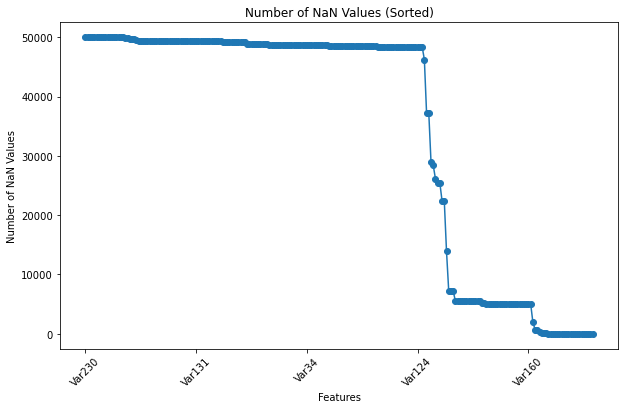

In [23]:
nan_counts = train.isnull().sum()
nan_counts_sorted = nan_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))  
nan_counts_sorted.plot(kind='line', marker='o')
plt.xlabel('Features')
plt.ylabel('Number of NaN Values')
plt.title('Number of NaN Values (Sorted)')
plt.xticks(rotation=45) 
plt.show()



In [24]:
missing = train.isnull().sum() / train.shape[0]
missing

Var1      0.98596
Var2      0.97518
Var3      0.97520
Var4      0.96842
Var5      0.97026
           ...   
Var226    0.00000
Var227    0.00000
Var228    0.00000
Var229    0.56864
Var230    1.00000
Length: 230, dtype: float64

In [25]:
missing = train.isnull().sum() / train.shape[0]
features_nan = missing[missing == 1].index

print(features_nan)
len(features_nan)


Index(['Var8', 'Var15', 'Var20', 'Var31', 'Var32', 'Var39', 'Var42', 'Var48',
       'Var52', 'Var55', 'Var79', 'Var141', 'Var167', 'Var169', 'Var175',
       'Var185', 'Var209', 'Var230'],
      dtype='object')


18

selecting attributes that have less than 60% of Nan:

In [26]:
missing = train.isnull().sum() / train.shape[0]
features = missing[missing < 0.60]

print(features)
len(features)
features=  features.index

Var6      0.11058
Var7      0.11078
Var13     0.11078
Var21     0.11058
Var22     0.10018
           ...   
Var225    0.52288
Var226    0.00000
Var227    0.00000
Var228    0.00000
Var229    0.56864
Length: 74, dtype: float64


In [27]:
count_all_nan_rows = train[train.isnull().all(axis=1)].shape[0]

print("Count of rows with NaN as every value:", count_all_nan_rows)


Count of rows with NaN as every value: 0


Categorical numerical spli:

In [28]:
categorical_features = [feat for feat in features if t_types[feat] != float]

print(categorical_features)
len(categorical_features)

['Var192', 'Var193', 'Var195', 'Var196', 'Var197', 'Var198', 'Var199', 'Var200', 'Var202', 'Var203', 'Var204', 'Var205', 'Var206', 'Var207', 'Var208', 'Var210', 'Var211', 'Var212', 'Var214', 'Var216', 'Var217', 'Var218', 'Var219', 'Var220', 'Var221', 'Var222', 'Var223', 'Var225', 'Var226', 'Var227', 'Var228', 'Var229']


32

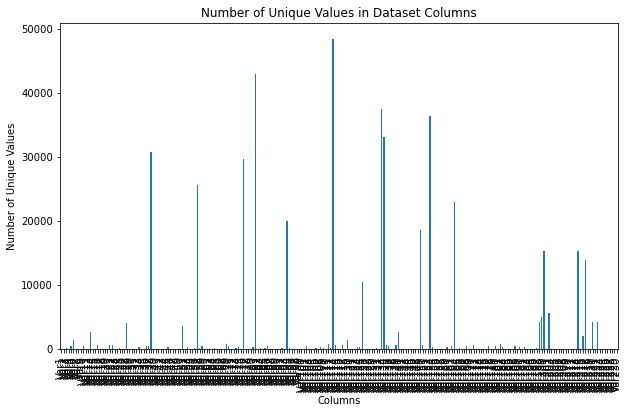

In [29]:
unique_value_counts = train.nunique()

plt.figure(figsize=(10, 6))  
unique_value_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values in Dataset Columns')
plt.show()


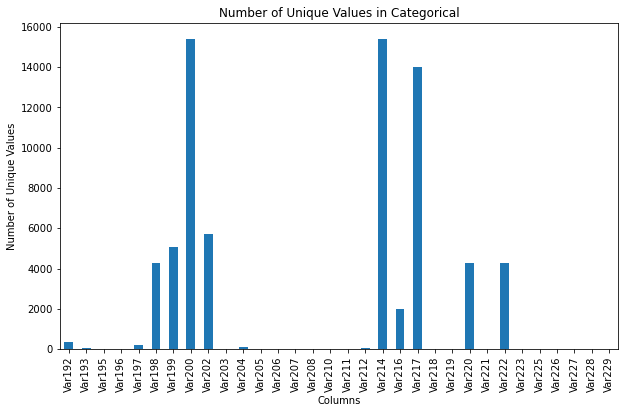

In [30]:
unique_value_counts = train[categorical_features].nunique()

plt.figure(figsize=(10, 6))  
unique_value_counts.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Unique Values')
plt.title('Number of Unique Values in Categorical')
plt.show()


In [31]:
numeric_features = train[features].select_dtypes(include=[np.number]).columns.tolist()
print(numeric_features)
len(numeric_features)

['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25', 'Var28', 'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var72', 'Var73', 'Var74', 'Var76', 'Var78', 'Var81', 'Var83', 'Var85', 'Var94', 'Var109', 'Var112', 'Var113', 'Var119', 'Var123', 'Var125', 'Var126', 'Var132', 'Var133', 'Var134', 'Var140', 'Var143', 'Var144', 'Var149', 'Var153', 'Var160', 'Var163', 'Var173', 'Var181', 'Var189']


42

### NAN Values in Numerical handling

In [32]:
train[numeric_features] = train[numeric_features].fillna(
    train[numeric_features].mean()
)


In [33]:
train[numeric_features].isnull().sum()
#should be zero after this

Var6      0
Var7      0
Var13     0
Var21     0
Var22     0
Var24     0
Var25     0
Var28     0
Var35     0
Var38     0
Var44     0
Var57     0
Var65     0
Var72     0
Var73     0
Var74     0
Var76     0
Var78     0
Var81     0
Var83     0
Var85     0
Var94     0
Var109    0
Var112    0
Var113    0
Var119    0
Var123    0
Var125    0
Var126    0
Var132    0
Var133    0
Var134    0
Var140    0
Var143    0
Var144    0
Var149    0
Var153    0
Var160    0
Var163    0
Var173    0
Var181    0
Var189    0
dtype: int64

In [34]:
features_filtered = numeric_features + categorical_features
print(features_filtered)
print(len(features_filtered))


['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25', 'Var28', 'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var72', 'Var73', 'Var74', 'Var76', 'Var78', 'Var81', 'Var83', 'Var85', 'Var94', 'Var109', 'Var112', 'Var113', 'Var119', 'Var123', 'Var125', 'Var126', 'Var132', 'Var133', 'Var134', 'Var140', 'Var143', 'Var144', 'Var149', 'Var153', 'Var160', 'Var163', 'Var173', 'Var181', 'Var189', 'Var192', 'Var193', 'Var195', 'Var196', 'Var197', 'Var198', 'Var199', 'Var200', 'Var202', 'Var203', 'Var204', 'Var205', 'Var206', 'Var207', 'Var208', 'Var210', 'Var211', 'Var212', 'Var214', 'Var216', 'Var217', 'Var218', 'Var219', 'Var220', 'Var221', 'Var222', 'Var223', 'Var225', 'Var226', 'Var227', 'Var228', 'Var229']
74


In [35]:
train_f = train[features_filtered]
train_f

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var219,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229
0,1526.000000,7.000000,184.000000,464.000000,580.000000,14.000000,128.00000,166.560000,0.00000,3.570000e+03,...,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN
1,525.000000,0.000000,0.000000,168.000000,210.000000,2.000000,24.00000,353.520000,0.00000,4.764966e+06,...,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN
2,5236.000000,7.000000,904.000000,1212.000000,1515.000000,26.000000,816.00000,220.080000,0.00000,5.883894e+06,...,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c
3,1326.437116,0.000000,0.000000,234.518225,0.000000,4.507926,0.00000,22.080000,0.00000,0.000000e+00,...,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN
4,1029.000000,7.000000,3216.000000,64.000000,80.000000,4.000000,64.00000,200.000000,0.00000,0.000000e+00,...,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,357.000000,0.000000,0.000000,132.000000,165.000000,2.000000,0.00000,288.080000,0.00000,6.042420e+06,...,FzaX,3JmRJnY,oslk,EROH7Cg,LM8l689qOp,NaN,7FJQ,RAYp,F2FyR07IdsN7I,NaN
49996,1078.000000,0.000000,2736.000000,380.000000,475.000000,2.000000,88.00000,166.560000,0.00000,0.000000e+00,...,FzaX,MMTv4zN,oslk,GfSQowC,LM8l689qOp,kG3k,FSa2,RAYp,55YFVY9,am7c
49997,2807.000000,7.000000,1460.000000,568.000000,710.000000,4.000000,328.00000,166.560000,0.00000,4.221000e+04,...,FzaX,FM28hdx,oslk,dh6qI2t,LM8l689qOp,ELof,fKCe,RAYp,TCU50_Yjmm6GIBZ0lL_,NaN
49998,1326.437116,6.809496,1249.688401,234.518225,290.245382,4.507926,96.82701,224.507669,0.71681,2.579107e+06,...,FzaX,BV9YlW4,oslk,2fF2Oqu,LM8l689qOp,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN


In [36]:
train_f.describe()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var189
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,...,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000
mean,1326.437116,6.809496,1249.688401,234.518225,290.245382,4.507926,96.827010,224.507669,0.716810,2.579107e+06,...,1381.259643,0.058012,11.727665,2.949208e+05,6.181967e+06,38.803005,4.860780e+05,0.006846,0.611456,270.142137
std,2532.849475,5.965363,2635.596185,533.373831,668.270306,9.182934,203.299616,93.452978,2.841975,2.855321e+06,...,3762.985373,0.609999,11.053281,6.075466e+05,4.125336e+06,94.381739,8.052215e+05,0.125691,2.367372,56.221658
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-66.880000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,6.000000
25%,581.000000,0.000000,4.000000,120.000000,150.000000,0.000000,16.000000,166.560000,0.000000,1.762500e+04,...,0.000000,0.000000,0.000000,0.000000e+00,1.608488e+06,10.000000,0.000000e+00,0.000000,0.000000,270.142137
50%,945.000000,7.000000,376.000000,156.000000,190.000000,2.000000,56.000000,220.080000,0.000000,2.073606e+06,...,360.000000,0.000000,9.000000,1.234835e+05,6.181967e+06,26.000000,2.100360e+05,0.000000,0.000000,270.142137
75%,1326.437116,7.000000,1264.000000,234.518225,290.245382,4.507926,104.000000,256.960000,0.000000,4.241100e+06,...,1381.259643,0.000000,18.000000,3.067312e+05,1.033293e+07,38.803005,5.254020e+05,0.000000,0.000000,270.142137
max,131761.000000,140.000000,197872.000000,36272.000000,45340.000000,494.000000,13168.000000,5158.560000,110.000000,1.884690e+07,...,520545.000000,18.000000,81.000000,1.693440e+07,1.390780e+07,4862.000000,1.451520e+07,6.000000,49.000000,642.000000


### Hot encoding test

In [37]:
temp = pd.get_dummies(train_f, dtype=bool)

In [38]:
temp

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var228_d0LtHjWeaXyArdN4sxU_saXqH,Var228_ib5G6X1eUxUn6,Var228_iyHGyLCEkQ,Var228_n1OBWGkV3fbsHR75taC,Var228_r_7E,Var228_xwM2aC7IdeMC0,Var229_am7c,Var229_mj86,Var229_oJmt,Var229_sk2h
0,1526.000000,7.000000,184.000000,464.000000,580.000000,14.000000,128.00000,166.560000,0.00000,3.570000e+03,...,False,False,False,False,False,False,False,False,False,False
1,525.000000,0.000000,0.000000,168.000000,210.000000,2.000000,24.00000,353.520000,0.00000,4.764966e+06,...,False,False,False,False,False,False,False,False,False,False
2,5236.000000,7.000000,904.000000,1212.000000,1515.000000,26.000000,816.00000,220.080000,0.00000,5.883894e+06,...,False,True,False,False,False,False,True,False,False,False
3,1326.437116,0.000000,0.000000,234.518225,0.000000,4.507926,0.00000,22.080000,0.00000,0.000000e+00,...,False,False,False,False,False,False,False,False,False,False
4,1029.000000,7.000000,3216.000000,64.000000,80.000000,4.000000,64.00000,200.000000,0.00000,0.000000e+00,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,357.000000,0.000000,0.000000,132.000000,165.000000,2.000000,0.00000,288.080000,0.00000,6.042420e+06,...,False,False,False,False,False,False,False,False,False,False
49996,1078.000000,0.000000,2736.000000,380.000000,475.000000,2.000000,88.00000,166.560000,0.00000,0.000000e+00,...,False,False,False,False,False,False,True,False,False,False
49997,2807.000000,7.000000,1460.000000,568.000000,710.000000,4.000000,328.00000,166.560000,0.00000,4.221000e+04,...,False,False,False,False,False,False,False,False,False,False
49998,1326.437116,6.809496,1249.688401,234.518225,290.245382,4.507926,96.82701,224.507669,0.71681,2.579107e+06,...,False,False,False,False,False,False,False,False,False,False


In [39]:
temp.shape ##za duzo pamieci 

(50000, 71537)

### Categorical missing values handling

In [40]:
missing = train_f[categorical_features].isnull().sum() / train_f[categorical_features].shape[0]
missing

Var192    0.00738
Var193    0.00000
Var195    0.00000
Var196    0.00000
Var197    0.00286
Var198    0.00000
Var199    0.00008
Var200    0.50816
Var202    0.00002
Var203    0.00286
Var204    0.00000
Var205    0.03868
Var206    0.11058
Var207    0.00000
Var208    0.00286
Var210    0.00000
Var211    0.00000
Var212    0.00000
Var214    0.50816
Var216    0.00000
Var217    0.01406
Var218    0.01406
Var219    0.10422
Var220    0.00000
Var221    0.00000
Var222    0.00000
Var223    0.10422
Var225    0.52288
Var226    0.00000
Var227    0.00000
Var228    0.00000
Var229    0.56864
dtype: float64

In [41]:
for col in categorical_features:
    train_f.loc[:,col] = train_f[col].cat.add_categories("Missing").fillna("Missing")
train_f.head(20)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var219,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229
0,1526.000000,7.0,184.0,464.000000,580.0,14.000000,128.0,166.56,0.0,3570.0,...,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,Missing,xb3V,RAYp,F2FyR07IdsN7I,Missing
1,525.000000,0.0,0.0,168.000000,210.0,2.000000,24.0,353.52,0.0,4764966.0,...,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,Missing,fKCe,RAYp,F2FyR07IdsN7I,Missing
2,5236.000000,7.0,904.0,1212.000000,1515.0,26.000000,816.0,220.08,0.0,5883894.0,...,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c
3,1326.437116,0.0,0.0,234.518225,0.0,4.507926,0.0,22.08,0.0,0.0,...,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,Missing,FSa2,RAYp,F2FyR07IdsN7I,Missing
4,1029.000000,7.0,3216.0,64.000000,80.0,4.000000,64.0,200.00,0.0,0.0,...,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86
5,658.000000,7.0,3156.0,224.000000,280.0,2.000000,72.0,200.00,5.0,0.0,...,FzaX,KbkKEj0,zCkv,QqVuch3,LM8l689qOp,Missing,Qcbd,02N6s8f,Zy3gnGM,am7c
6,1680.000000,7.0,2952.0,308.000000,385.0,4.000000,128.0,176.56,0.0,13158.0,...,FzaX,JO03372,oslk,XlgxB9z,LM8l689qOp,kG3k,FSa2,RAYp,55YFVY9,am7c
7,77.000000,0.0,0.0,32.000000,40.0,2.000000,16.0,230.56,0.0,3776496.0,...,Missing,U8IKsQe,oslk,R2LdzOv,Missing,Missing,FSa2,RAYp,F2FyR07IdsN7I,Missing
8,1176.000000,7.0,2912.0,200.000000,250.0,2.000000,64.0,300.32,0.0,6014460.0,...,FzaX,ROeipLp,zCkv,K2SqEo9,jySVZNlOJy,kG3k,PM2D,6fzt,am14IcfM7tWLrUmRT52KtA,am7c
9,1141.000000,7.0,164.0,208.000000,260.0,2.000000,72.0,166.56,5.0,5317974.0,...,FzaX,fabLnWA,oslk,EPqQcw6,LM8l689qOp,kG3k,FSa2,RAYp,55YFVY9,Missing


### frequency encoding of categorical features

In [42]:
frequency_encoded = train_f[categorical_features].apply(lambda x: x.map(x.value_counts(normalize=True)))

train_final = train_f.copy()
encoded_names = [str(col) + '_f_encoded' for col in categorical_features]

train_final[encoded_names] = frequency_encoded
train_final[encoded_names] = train_final[encoded_names].astype(float)
train_final

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var219_f_encoded,Var220_f_encoded,Var221_f_encoded,Var222_f_encoded,Var223_f_encoded,Var225_f_encoded,Var226_f_encoded,Var227_f_encoded,Var228_f_encoded,Var229_f_encoded
0,1526.000000,7.000000,184.000000,464.000000,580.000000,14.000000,128.00000,166.560000,0.00000,3.570000e+03,...,0.80608,0.00234,0.74018,0.00234,0.11990,0.52288,0.04216,0.70312,0.65406,0.56864
1,525.000000,0.000000,0.000000,168.000000,210.000000,2.000000,24.00000,353.520000,0.00000,4.764966e+06,...,0.80608,0.00358,0.74018,0.00358,0.73216,0.52288,0.05228,0.70312,0.65406,0.56864
2,5236.000000,7.000000,904.000000,1212.000000,1515.000000,26.000000,816.00000,220.080000,0.00000,5.883894e+06,...,0.80608,0.00154,0.03324,0.00154,0.11990,0.20858,0.09664,0.04684,0.05344,0.23378
3,1326.437116,0.000000,0.000000,234.518225,0.000000,4.507926,0.00000,22.080000,0.00000,0.000000e+00,...,0.80608,0.00460,0.74018,0.00460,0.73216,0.52288,0.16062,0.70312,0.65406,0.56864
4,1029.000000,7.000000,3216.000000,64.000000,80.000000,4.000000,64.00000,200.000000,0.00000,0.000000e+00,...,0.80608,0.00062,0.74018,0.00062,0.73216,0.20858,0.16062,0.70312,0.65406,0.19608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,357.000000,0.000000,0.000000,132.000000,165.000000,2.000000,0.00000,288.080000,0.00000,6.042420e+06,...,0.80608,0.00098,0.74018,0.00098,0.73216,0.52288,0.01128,0.70312,0.65406,0.56864
49996,1078.000000,0.000000,2736.000000,380.000000,475.000000,2.000000,88.00000,166.560000,0.00000,0.000000e+00,...,0.80608,0.00040,0.74018,0.00040,0.73216,0.20858,0.16062,0.70312,0.08708,0.23378
49997,2807.000000,7.000000,1460.000000,568.000000,710.000000,4.000000,328.00000,166.560000,0.00000,4.221000e+04,...,0.80608,0.00082,0.74018,0.00082,0.73216,0.22144,0.05228,0.70312,0.02532,0.56864
49998,1326.437116,6.809496,1249.688401,234.518225,290.245382,4.507926,96.82701,224.507669,0.71681,2.579107e+06,...,0.80608,0.00072,0.74018,0.00072,0.73216,0.52288,0.16062,0.70312,0.65406,0.56864


In [43]:
# numerical 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaled_df = train_final.copy()

#standarise
#scaler = StandardScaler()
#scaled_df[numeric_features] = scaler.fit_transform(train_final[numeric_features])

# Scale numerical  0-1
scaler = MinMaxScaler()
scaled_df[numeric_features] = scaler.fit_transform(train_final[numeric_features])
scaled_df


,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var219_f_encoded,Var220_f_encoded,Var221_f_encoded,Var222_f_encoded,Var223_f_encoded,Var225_f_encoded,Var226_f_encoded,Var227_f_encoded,Var228_f_encoded,Var229_f_encoded
0,0.011582,0.050000,0.000930,0.012792,0.012792,0.028340,0.009721,0.044674,0.000000,0.000189,...,0.80608,0.00234,0.74018,0.00234,0.11990,0.52288,0.04216,0.70312,0.65406,0.56864
1,0.003984,0.000000,0.000000,0.004632,0.004632,0.004049,0.001823,0.080453,0.000000,0.252825,...,0.80608,0.00358,0.74018,0.00358,0.73216,0.52288,0.05228,0.70312,0.65406,0.56864
2,0.039739,0.050000,0.004569,0.033414,0.033414,0.052632,0.061968,0.054916,0.000000,0.312194,...,0.80608,0.00154,0.03324,0.00154,0.11990,0.20858,0.09664,0.04684,0.05344,0.23378
3,0.010067,0.000000,0.000000,0.006466,0.000000,0.009125,0.000000,0.017024,0.000000,0.000000,...,0.80608,0.00460,0.74018,0.00460,0.73216,0.52288,0.16062,0.70312,0.65406,0.56864
4,0.007810,0.050000,0.016253,0.001764,0.001764,0.008097,0.004860,0.051073,0.000000,0.000000,...,0.80608,0.00062,0.74018,0.00062,0.73216,0.20858,0.16062,0.70312,0.65406,0.19608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.002709,0.000000,0.000000,0.003639,0.003639,0.004049,0.000000,0.067929,0.000000,0.320606,...,0.80608,0.00098,0.74018,0.00098,0.73216,0.52288,0.01128,0.70312,0.65406,0.56864
49996,0.008181,0.000000,0.013827,0.010476,0.010476,0.004049,0.006683,0.044674,0.000000,0.000000,...,0.80608,0.00040,0.74018,0.00040,0.73216,0.20858,0.16062,0.70312,0.08708,0.23378
49997,0.021304,0.050000,0.007379,0.015659,0.015659,0.008097,0.024909,0.044674,0.000000,0.002240,...,0.80608,0.00082,0.74018,0.00082,0.73216,0.22144,0.05228,0.70312,0.02532,0.56864
49998,0.010067,0.048639,0.006316,0.006466,0.006402,0.009125,0.007353,0.055763,0.006516,0.136845,...,0.80608,0.00072,0.74018,0.00072,0.73216,0.52288,0.16062,0.70312,0.65406,0.56864


In [44]:
train_final_2 = scaled_df[ numeric_features + encoded_names]
train_final_2


,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var219_f_encoded,Var220_f_encoded,Var221_f_encoded,Var222_f_encoded,Var223_f_encoded,Var225_f_encoded,Var226_f_encoded,Var227_f_encoded,Var228_f_encoded,Var229_f_encoded
0,0.011582,0.050000,0.000930,0.012792,0.012792,0.028340,0.009721,0.044674,0.000000,0.000189,...,0.80608,0.00234,0.74018,0.00234,0.11990,0.52288,0.04216,0.70312,0.65406,0.56864
1,0.003984,0.000000,0.000000,0.004632,0.004632,0.004049,0.001823,0.080453,0.000000,0.252825,...,0.80608,0.00358,0.74018,0.00358,0.73216,0.52288,0.05228,0.70312,0.65406,0.56864
2,0.039739,0.050000,0.004569,0.033414,0.033414,0.052632,0.061968,0.054916,0.000000,0.312194,...,0.80608,0.00154,0.03324,0.00154,0.11990,0.20858,0.09664,0.04684,0.05344,0.23378
3,0.010067,0.000000,0.000000,0.006466,0.000000,0.009125,0.000000,0.017024,0.000000,0.000000,...,0.80608,0.00460,0.74018,0.00460,0.73216,0.52288,0.16062,0.70312,0.65406,0.56864
4,0.007810,0.050000,0.016253,0.001764,0.001764,0.008097,0.004860,0.051073,0.000000,0.000000,...,0.80608,0.00062,0.74018,0.00062,0.73216,0.20858,0.16062,0.70312,0.65406,0.19608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.002709,0.000000,0.000000,0.003639,0.003639,0.004049,0.000000,0.067929,0.000000,0.320606,...,0.80608,0.00098,0.74018,0.00098,0.73216,0.52288,0.01128,0.70312,0.65406,0.56864
49996,0.008181,0.000000,0.013827,0.010476,0.010476,0.004049,0.006683,0.044674,0.000000,0.000000,...,0.80608,0.00040,0.74018,0.00040,0.73216,0.20858,0.16062,0.70312,0.08708,0.23378
49997,0.021304,0.050000,0.007379,0.015659,0.015659,0.008097,0.024909,0.044674,0.000000,0.002240,...,0.80608,0.00082,0.74018,0.00082,0.73216,0.22144,0.05228,0.70312,0.02532,0.56864
49998,0.010067,0.048639,0.006316,0.006466,0.006402,0.009125,0.007353,0.055763,0.006516,0.136845,...,0.80608,0.00072,0.74018,0.00072,0.73216,0.52288,0.16062,0.70312,0.65406,0.56864


In [45]:
train_final_2.dtypes

Var6                float64
Var7                float64
Var13               float64
Var21               float64
Var22               float64
                     ...   
Var225_f_encoded    float64
Var226_f_encoded    float64
Var227_f_encoded    float64
Var228_f_encoded    float64
Var229_f_encoded    float64
Length: 74, dtype: object

##### DATA SPLIT

In [46]:
x_train, x_test, y_train, y_test = train_test_split(
    train_final_2, upselling, test_size=0.3, random_state=RANDOM_SEED
)

In [47]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(35000, 74)
(15000, 74)
(35000,)
(15000,)


# RandomForestClassifier

na początku dla wszystkich atrybutów

In [48]:
rfc = RandomForestClassifier(
    n_estimators=500, max_depth=10, n_jobs=8, random_state=RANDOM_SEED, verbose=1
)


In [49]:
rfc.fit(x_train, y_train)


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    3.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    7.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    8.2s finished


RandomForestClassifier(max_depth=10, n_estimators=500, n_jobs=8,
                       random_state=1319, verbose=1)

In [50]:
y_score_rfc = rfc.predict_proba(x_test)
y_score_rfc

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished


array([[0.92219789, 0.07780211],
       [0.92063974, 0.07936026],
       [0.96231076, 0.03768924],
       ...,
       [0.92060219, 0.07939781],
       [0.95542702, 0.04457298],
       [0.9723409 , 0.0276591 ]])

AUC

In [51]:
def plot_roc_curve(y_true, y_score, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_score[:, 1])
    roc_auc = auc(fpr, tpr)
    print(roc_auc)
    plt.figure(figsize=(12, 5))
    lw = 2
    plt.plot(
        fpr,
        tpr,
        color="orange",
        lw=lw,
        label="ROC curve area = %0.2f" % roc_auc,
    )
    plt.plot([0, 1], [0, 1], color="blue", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC for %s model" % model_name)
    plt.legend(loc="lower right")
    plt.show()


0.8630851436608528


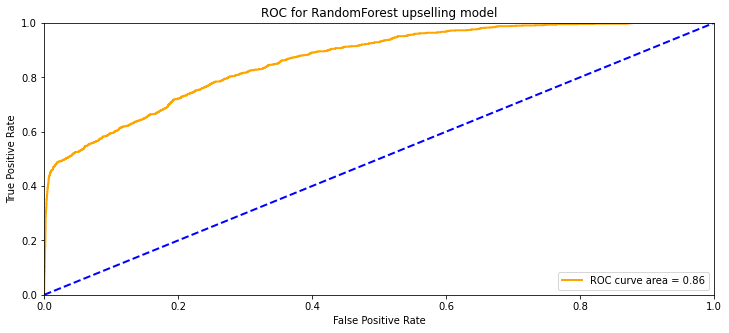

In [52]:
plot_roc_curve(y_test, y_score_rfc, "RandomForest upselling")


In [53]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support,roc_auc_score)
predictions = rfc.predict(x_test)
print(classification_report(y_test,predictions))



[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.95      1.00      0.97     13885
           1       0.90      0.31      0.46      1115

    accuracy                           0.95     15000
   macro avg       0.92      0.65      0.71     15000
weighted avg       0.94      0.95      0.93     15000



[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished


##### Try with LASSO (least absolute shrinkage and selection operator)

In [54]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.0025)  
lasso.fit(train_final_2, upselling)

Lasso(alpha=0.0025)

In [55]:
feature_importance = lasso.coef_
feature_importance

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.23025188, -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.04185623,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.0222116 ,
       -0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.01707346,  0.17480268, -0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        , -0.  

In [56]:
feature_coefs = pd.Series(lasso.coef_, index=train_final_2.columns)

selected_features = feature_coefs[feature_coefs != 0].index.tolist()

selected_df2 = train_final_2[selected_features]#subset
selected_df2

,Var126,Var153,Var200_f_encoded,Var210_f_encoded,Var211_f_encoded
0,0.400000,0.130305,0.50816,0.9514,0.80598
1,0.314461,0.750598,0.50816,0.9514,0.80598
2,0.040000,0.706536,0.00004,0.9514,0.80598
3,0.180000,0.000000,0.50816,0.9514,0.19402
4,0.900000,0.046365,0.00008,0.9514,0.80598
...,...,...,...,...,...
49995,0.040000,0.745412,0.50816,0.9514,0.80598
49996,0.020000,0.096701,0.00002,0.9514,0.19402
49997,0.314461,0.089306,0.00004,0.9514,0.80598
49998,0.160000,0.444496,0.50816,0.9514,0.19402


In [57]:
x_train_lasso, x_test_lasso, y_train_lasso, y_test_lasso = train_test_split(
    selected_df2, upselling, test_size=0.3, random_state=RANDOM_SEED
)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    2.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s


0.842111321214783


[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.2s finished


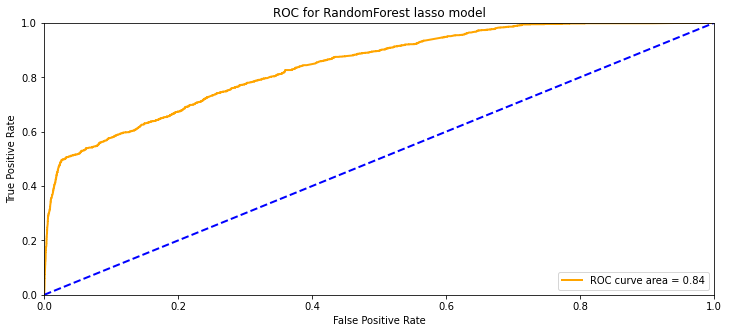

In [58]:
rfc_lasso = RandomForestClassifier(
    n_estimators=500, max_depth=10, n_jobs=8, random_state=RANDOM_SEED, verbose=1
)
rfc_lasso.fit(x_train_lasso, y_train_lasso)
y_score_rfc_lasso = rfc_lasso.predict_proba(x_test_lasso)
y_score_rfc_lasso
plot_roc_curve(y_test_lasso, y_score_rfc_lasso, "RandomForest lasso")


### Próba wyszukania najlepszego ustawienia parametrów w RandomForestClassifier

 dodatkowo pomoże wybrać ustawienia do stosowania w kolejnych krokach

In [59]:
from sklearn.model_selection import GridSearchCV

rfc_grid = RandomForestClassifier(n_jobs=16, random_state=RANDOM_SEED, verbose=1)
param_grid = {'n_estimators': [300,500,700,2100],  
              'max_depth': [6,9,13,19]}  
   
grid = GridSearchCV(rfc_grid, param_grid, cv=5, scoring="roc_auc", verbose=10) 

# fitting the model for grid search 
grid.fit(x_train, y_train) 
 
print(grid.best_params_) 
print(grid.best_score_) 


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START max_depth=6, n_estimators=300..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    6.1s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    7.7s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    8.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.1s finished


[CV 1/5; 1/16] END max_depth=6, n_estimators=300;, score=0.861 total time=   9.4s
[CV 2/5; 1/16] START max_depth=6, n_estimators=300..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    2.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.1s finished


[CV 2/5; 1/16] END max_depth=6, n_estimators=300;, score=0.852 total time=   2.9s
[CV 3/5; 1/16] START max_depth=6, n_estimators=300..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    2.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.1s finished


[CV 3/5; 1/16] END max_depth=6, n_estimators=300;, score=0.854 total time=   3.1s
[CV 4/5; 1/16] START max_depth=6, n_estimators=300..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    2.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


[CV 4/5; 1/16] END max_depth=6, n_estimators=300;, score=0.858 total time=   3.2s
[CV 5/5; 1/16] START max_depth=6, n_estimators=300..............................


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 269 out of 300 | elapsed:    2.5s remaining:    0.2s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    2.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.0s finished


[CV 5/5; 1/16] END max_depth=6, n_estimators=300;, score=0.853 total time=   3.0s
[CV 1/5; 2/16] START max_depth=6, n_estimators=500..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    2.6s
[Parallel(n_jobs=16)]: Done 469 out of 500 | elapsed:    4.0s remaining:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    4.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished


[CV 1/5; 2/16] END max_depth=6, n_estimators=500;, score=0.862 total time=   4.8s
[CV 2/5; 2/16] START max_depth=6, n_estimators=500..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    2.6s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    4.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished


[CV 2/5; 2/16] END max_depth=6, n_estimators=500;, score=0.852 total time=   4.8s
[CV 3/5; 2/16] START max_depth=6, n_estimators=500..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    3.0s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    4.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished


[CV 3/5; 2/16] END max_depth=6, n_estimators=500;, score=0.855 total time=   5.2s
[CV 4/5; 2/16] START max_depth=6, n_estimators=500..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    3.3s
[Parallel(n_jobs=16)]: Done 469 out of 500 | elapsed:    4.8s remaining:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    4.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV 4/5; 2/16] END max_depth=6, n_estimators=500;, score=0.859 total time=   5.5s
[CV 5/5; 2/16] START max_depth=6, n_estimators=500..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    2.7s
[Parallel(n_jobs=16)]: Done 469 out of 500 | elapsed:    4.1s remaining:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    4.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished


[CV 5/5; 2/16] END max_depth=6, n_estimators=500;, score=0.853 total time=   5.0s
[CV 1/5; 3/16] START max_depth=6, n_estimators=700..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    2.7s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    6.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    0.2s finished


[CV 1/5; 3/16] END max_depth=6, n_estimators=700;, score=0.862 total time=   6.8s
[CV 2/5; 3/16] START max_depth=6, n_estimators=700..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    2.6s
[Parallel(n_jobs=16)]: Done 669 out of 700 | elapsed:    5.7s remaining:    0.2s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    5.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    0.3s finished


[CV 2/5; 3/16] END max_depth=6, n_estimators=700;, score=0.852 total time=   6.6s
[CV 3/5; 3/16] START max_depth=6, n_estimators=700..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    2.6s
[Parallel(n_jobs=16)]: Done 669 out of 700 | elapsed:    5.6s remaining:    0.2s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    5.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    0.2s finished


[CV 3/5; 3/16] END max_depth=6, n_estimators=700;, score=0.854 total time=   6.6s
[CV 4/5; 3/16] START max_depth=6, n_estimators=700..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    2.6s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    5.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    0.2s finished


[CV 4/5; 3/16] END max_depth=6, n_estimators=700;, score=0.859 total time=   6.5s
[CV 5/5; 3/16] START max_depth=6, n_estimators=700..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    2.6s
[Parallel(n_jobs=16)]: Done 669 out of 700 | elapsed:    5.7s remaining:    0.2s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    5.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    0.3s finished


[CV 5/5; 3/16] END max_depth=6, n_estimators=700;, score=0.853 total time=   6.7s
[CV 1/5; 4/16] START max_depth=6, n_estimators=2100.............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    2.6s
[Parallel(n_jobs=16)]: Done 804 tasks      | elapsed:    6.9s
[Parallel(n_jobs=16)]: Done 1504 tasks      | elapsed:   12.6s
[Parallel(n_jobs=16)]: Done 2069 out of 2100 | elapsed:   17.5s remaining:    0.2s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:   17.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.8s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:    0.9

[CV 1/5; 4/16] END max_depth=6, n_estimators=2100;, score=0.861 total time=  19.7s
[CV 2/5; 4/16] START max_depth=6, n_estimators=2100.............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    2.6s
[Parallel(n_jobs=16)]: Done 804 tasks      | elapsed:    6.7s
[Parallel(n_jobs=16)]: Done 1504 tasks      | elapsed:   12.7s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:   17.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.7s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    1.0s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:    1.1s finished


[CV 2/5; 4/16] END max_depth=6, n_estimators=2100;, score=0.852 total time=  19.8s
[CV 3/5; 4/16] START max_depth=6, n_estimators=2100.............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    2.6s
[Parallel(n_jobs=16)]: Done 804 tasks      | elapsed:    6.8s
[Parallel(n_jobs=16)]: Done 1504 tasks      | elapsed:   12.6s
[Parallel(n_jobs=16)]: Done 2069 out of 2100 | elapsed:   17.2s remaining:    0.2s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:   17.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.8s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:    1.0

[CV 3/5; 4/16] END max_depth=6, n_estimators=2100;, score=0.854 total time=  19.3s
[CV 4/5; 4/16] START max_depth=6, n_estimators=2100.............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    2.6s
[Parallel(n_jobs=16)]: Done 804 tasks      | elapsed:    6.7s
[Parallel(n_jobs=16)]: Done 1504 tasks      | elapsed:   12.5s
[Parallel(n_jobs=16)]: Done 2069 out of 2100 | elapsed:   17.4s remaining:    0.2s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:   17.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.7s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:    0.9

[CV 4/5; 4/16] END max_depth=6, n_estimators=2100;, score=0.859 total time=  19.5s
[CV 5/5; 4/16] START max_depth=6, n_estimators=2100.............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    2.6s
[Parallel(n_jobs=16)]: Done 804 tasks      | elapsed:    6.8s
[Parallel(n_jobs=16)]: Done 1504 tasks      | elapsed:   12.5s
[Parallel(n_jobs=16)]: Done 2069 out of 2100 | elapsed:   17.2s remaining:    0.2s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:   17.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.8s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:    0.9

[CV 5/5; 4/16] END max_depth=6, n_estimators=2100;, score=0.853 total time=  19.2s
[CV 1/5; 5/16] START max_depth=9, n_estimators=300..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 269 out of 300 | elapsed:    3.3s remaining:    0.3s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


[CV 1/5; 5/16] END max_depth=9, n_estimators=300;, score=0.860 total time=   3.9s
[CV 2/5; 5/16] START max_depth=9, n_estimators=300..............................


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    3.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


[CV 2/5; 5/16] END max_depth=9, n_estimators=300;, score=0.855 total time=   3.8s
[CV 3/5; 5/16] START max_depth=9, n_estimators=300..............................


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 269 out of 300 | elapsed:    3.2s remaining:    0.3s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


[CV 3/5; 5/16] END max_depth=9, n_estimators=300;, score=0.855 total time=   3.9s
[CV 4/5; 5/16] START max_depth=9, n_estimators=300..............................


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 269 out of 300 | elapsed:    3.2s remaining:    0.3s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    3.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


[CV 4/5; 5/16] END max_depth=9, n_estimators=300;, score=0.857 total time=   3.9s
[CV 5/5; 5/16] START max_depth=9, n_estimators=300..............................


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 269 out of 300 | elapsed:    3.3s remaining:    0.3s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.1s finished


[CV 5/5; 5/16] END max_depth=9, n_estimators=300;, score=0.853 total time=   3.9s
[CV 1/5; 6/16] START max_depth=9, n_estimators=500..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    3.6s
[Parallel(n_jobs=16)]: Done 469 out of 500 | elapsed:    5.5s remaining:    0.3s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    5.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished


[CV 1/5; 6/16] END max_depth=9, n_estimators=500;, score=0.861 total time=   6.3s
[CV 2/5; 6/16] START max_depth=9, n_estimators=500..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    3.7s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    6.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV 2/5; 6/16] END max_depth=9, n_estimators=500;, score=0.854 total time=   6.6s
[CV 3/5; 6/16] START max_depth=9, n_estimators=500..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    3.8s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    6.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished


[CV 3/5; 6/16] END max_depth=9, n_estimators=500;, score=0.855 total time=   6.7s
[CV 4/5; 6/16] START max_depth=9, n_estimators=500..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    3.8s
[Parallel(n_jobs=16)]: Done 469 out of 500 | elapsed:    5.8s remaining:    0.3s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    6.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV 4/5; 6/16] END max_depth=9, n_estimators=500;, score=0.858 total time=   6.6s
[CV 5/5; 6/16] START max_depth=9, n_estimators=500..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    3.7s
[Parallel(n_jobs=16)]: Done 469 out of 500 | elapsed:    5.8s remaining:    0.3s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    6.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV 5/5; 6/16] END max_depth=9, n_estimators=500;, score=0.853 total time=   6.5s
[CV 1/5; 7/16] START max_depth=9, n_estimators=700..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    4.0s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    8.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    0.2s finished


[CV 1/5; 7/16] END max_depth=9, n_estimators=700;, score=0.861 total time=   9.6s
[CV 2/5; 7/16] START max_depth=9, n_estimators=700..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    3.8s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    8.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    0.3s finished


[CV 2/5; 7/16] END max_depth=9, n_estimators=700;, score=0.854 total time=   9.1s
[CV 3/5; 7/16] START max_depth=9, n_estimators=700..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    3.7s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    8.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    0.2s finished


[CV 3/5; 7/16] END max_depth=9, n_estimators=700;, score=0.856 total time=   9.0s
[CV 4/5; 7/16] START max_depth=9, n_estimators=700..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    3.7s
[Parallel(n_jobs=16)]: Done 669 out of 700 | elapsed:    8.1s remaining:    0.3s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    8.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    0.3s finished


[CV 4/5; 7/16] END max_depth=9, n_estimators=700;, score=0.858 total time=   9.2s
[CV 5/5; 7/16] START max_depth=9, n_estimators=700..............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    4.4s
[Parallel(n_jobs=16)]: Done 669 out of 700 | elapsed:    8.8s remaining:    0.3s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    9.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    0.2s finished


[CV 5/5; 7/16] END max_depth=9, n_estimators=700;, score=0.853 total time=  10.0s
[CV 1/5; 8/16] START max_depth=9, n_estimators=2100.............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    3.7s
[Parallel(n_jobs=16)]: Done 804 tasks      | elapsed:    9.9s
[Parallel(n_jobs=16)]: Done 1504 tasks      | elapsed:   18.6s
[Parallel(n_jobs=16)]: Done 2069 out of 2100 | elapsed:   25.5s remaining:    0.3s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:   25.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.8s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:    0.9

[CV 1/5; 8/16] END max_depth=9, n_estimators=2100;, score=0.861 total time=  27.7s
[CV 2/5; 8/16] START max_depth=9, n_estimators=2100.............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    3.7s
[Parallel(n_jobs=16)]: Done 804 tasks      | elapsed:    9.9s
[Parallel(n_jobs=16)]: Done 1504 tasks      | elapsed:   18.3s
[Parallel(n_jobs=16)]: Done 2069 out of 2100 | elapsed:   25.2s remaining:    0.3s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:   25.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.8s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:    0.9

[CV 2/5; 8/16] END max_depth=9, n_estimators=2100;, score=0.854 total time=  27.3s
[CV 3/5; 8/16] START max_depth=9, n_estimators=2100.............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    3.7s
[Parallel(n_jobs=16)]: Done 804 tasks      | elapsed:    9.9s
[Parallel(n_jobs=16)]: Done 1504 tasks      | elapsed:   18.5s
[Parallel(n_jobs=16)]: Done 2069 out of 2100 | elapsed:   25.3s remaining:    0.3s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:   25.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.7s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:    0.8

[CV 3/5; 8/16] END max_depth=9, n_estimators=2100;, score=0.856 total time=  27.3s
[CV 4/5; 8/16] START max_depth=9, n_estimators=2100.............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    3.7s
[Parallel(n_jobs=16)]: Done 804 tasks      | elapsed:    9.9s
[Parallel(n_jobs=16)]: Done 1504 tasks      | elapsed:   18.0s
[Parallel(n_jobs=16)]: Done 2069 out of 2100 | elapsed:   24.8s remaining:    0.3s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:   25.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.7s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:    0.8

[CV 4/5; 8/16] END max_depth=9, n_estimators=2100;, score=0.858 total time=  27.0s
[CV 5/5; 8/16] START max_depth=9, n_estimators=2100.............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    3.6s
[Parallel(n_jobs=16)]: Done 804 tasks      | elapsed:    9.3s
[Parallel(n_jobs=16)]: Done 1504 tasks      | elapsed:   17.3s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:   24.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.6s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.8s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:    1.0s finished


[CV 5/5; 8/16] END max_depth=9, n_estimators=2100;, score=0.854 total time=  26.2s
[CV 1/5; 9/16] START max_depth=13, n_estimators=300.............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    4.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


[CV 1/5; 9/16] END max_depth=13, n_estimators=300;, score=0.852 total time=   4.9s
[CV 2/5; 9/16] START max_depth=13, n_estimators=300.............................


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    4.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


[CV 2/5; 9/16] END max_depth=13, n_estimators=300;, score=0.845 total time=   4.8s
[CV 3/5; 9/16] START max_depth=13, n_estimators=300.............................


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    4.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


[CV 3/5; 9/16] END max_depth=13, n_estimators=300;, score=0.849 total time=   4.9s
[CV 4/5; 9/16] START max_depth=13, n_estimators=300.............................


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 269 out of 300 | elapsed:    4.3s remaining:    0.4s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    4.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


[CV 4/5; 9/16] END max_depth=13, n_estimators=300;, score=0.851 total time=   4.9s
[CV 5/5; 9/16] START max_depth=13, n_estimators=300.............................


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    4.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.1s finished


[CV 5/5; 9/16] END max_depth=13, n_estimators=300;, score=0.843 total time=   5.0s
[CV 1/5; 10/16] START max_depth=13, n_estimators=500............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    4.9s
[Parallel(n_jobs=16)]: Done 469 out of 500 | elapsed:    7.3s remaining:    0.4s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    7.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished


[CV 1/5; 10/16] END max_depth=13, n_estimators=500;, score=0.852 total time=   8.2s
[CV 2/5; 10/16] START max_depth=13, n_estimators=500............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    4.8s
[Parallel(n_jobs=16)]: Done 469 out of 500 | elapsed:    7.2s remaining:    0.4s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    7.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished


[CV 2/5; 10/16] END max_depth=13, n_estimators=500;, score=0.846 total time=   8.1s
[CV 3/5; 10/16] START max_depth=13, n_estimators=500............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    5.0s
[Parallel(n_jobs=16)]: Done 469 out of 500 | elapsed:    7.6s remaining:    0.4s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    7.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished


[CV 3/5; 10/16] END max_depth=13, n_estimators=500;, score=0.851 total time=   8.5s
[CV 4/5; 10/16] START max_depth=13, n_estimators=500............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    4.9s
[Parallel(n_jobs=16)]: Done 469 out of 500 | elapsed:    7.4s remaining:    0.4s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    7.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished


[CV 4/5; 10/16] END max_depth=13, n_estimators=500;, score=0.849 total time=   8.3s
[CV 5/5; 10/16] START max_depth=13, n_estimators=500............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    4.8s
[Parallel(n_jobs=16)]: Done 469 out of 500 | elapsed:    7.2s remaining:    0.4s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    7.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.1s finished


[CV 5/5; 10/16] END max_depth=13, n_estimators=500;, score=0.846 total time=   8.1s
[CV 1/5; 11/16] START max_depth=13, n_estimators=700............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    4.9s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:   10.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    0.3s finished


[CV 1/5; 11/16] END max_depth=13, n_estimators=700;, score=0.853 total time=  11.4s
[CV 2/5; 11/16] START max_depth=13, n_estimators=700............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    4.7s
[Parallel(n_jobs=16)]: Done 669 out of 700 | elapsed:   10.5s remaining:    0.4s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:   10.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    0.3s finished


[CV 2/5; 11/16] END max_depth=13, n_estimators=700;, score=0.848 total time=  11.6s
[CV 3/5; 11/16] START max_depth=13, n_estimators=700............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    5.0s
[Parallel(n_jobs=16)]: Done 669 out of 700 | elapsed:   11.0s remaining:    0.4s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:   11.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    0.3s finished


[CV 3/5; 11/16] END max_depth=13, n_estimators=700;, score=0.849 total time=  12.2s
[CV 4/5; 11/16] START max_depth=13, n_estimators=700............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    5.1s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:   10.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    0.3s finished


[CV 4/5; 11/16] END max_depth=13, n_estimators=700;, score=0.851 total time=  11.7s
[CV 5/5; 11/16] START max_depth=13, n_estimators=700............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    4.8s
[Parallel(n_jobs=16)]: Done 669 out of 700 | elapsed:   10.3s remaining:    0.4s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:   10.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    0.2s finished


[CV 5/5; 11/16] END max_depth=13, n_estimators=700;, score=0.846 total time=  11.4s
[CV 1/5; 12/16] START max_depth=13, n_estimators=2100...........................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    4.8s
[Parallel(n_jobs=16)]: Done 804 tasks      | elapsed:   12.6s
[Parallel(n_jobs=16)]: Done 1504 tasks      | elapsed:   24.0s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:   33.4s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.7s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:    0.8s finished


[CV 1/5; 12/16] END max_depth=13, n_estimators=2100;, score=0.854 total time=  35.2s
[CV 2/5; 12/16] START max_depth=13, n_estimators=2100...........................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    5.0s
[Parallel(n_jobs=16)]: Done 804 tasks      | elapsed:   13.0s
[Parallel(n_jobs=16)]: Done 1504 tasks      | elapsed:   24.3s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:   33.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.7s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:    0.9s finished


[CV 2/5; 12/16] END max_depth=13, n_estimators=2100;, score=0.850 total time=  35.6s
[CV 3/5; 12/16] START max_depth=13, n_estimators=2100...........................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    4.9s
[Parallel(n_jobs=16)]: Done 804 tasks      | elapsed:   13.0s
[Parallel(n_jobs=16)]: Done 1504 tasks      | elapsed:   24.2s
[Parallel(n_jobs=16)]: Done 2069 out of 2100 | elapsed:   33.2s remaining:    0.4s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:   33.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.7s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:    0.9

[CV 3/5; 12/16] END max_depth=13, n_estimators=2100;, score=0.850 total time=  35.4s
[CV 4/5; 12/16] START max_depth=13, n_estimators=2100...........................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    4.9s
[Parallel(n_jobs=16)]: Done 804 tasks      | elapsed:   12.8s
[Parallel(n_jobs=16)]: Done 1504 tasks      | elapsed:   24.0s
[Parallel(n_jobs=16)]: Done 2069 out of 2100 | elapsed:   33.2s remaining:    0.4s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:   33.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.8s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:    0.9

[CV 4/5; 12/16] END max_depth=13, n_estimators=2100;, score=0.852 total time=  35.3s
[CV 5/5; 12/16] START max_depth=13, n_estimators=2100...........................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    4.9s
[Parallel(n_jobs=16)]: Done 804 tasks      | elapsed:   12.9s
[Parallel(n_jobs=16)]: Done 1504 tasks      | elapsed:   24.2s
[Parallel(n_jobs=16)]: Done 2069 out of 2100 | elapsed:   33.6s remaining:    0.4s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:   34.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.6s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.8s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:    1.0

[CV 5/5; 12/16] END max_depth=13, n_estimators=2100;, score=0.848 total time=  35.9s
[CV 1/5; 13/16] START max_depth=19, n_estimators=300............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    6.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


[CV 1/5; 13/16] END max_depth=19, n_estimators=300;, score=0.835 total time=   6.6s
[CV 2/5; 13/16] START max_depth=19, n_estimators=300............................


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    6.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.1s finished


[CV 2/5; 13/16] END max_depth=19, n_estimators=300;, score=0.836 total time=   6.6s
[CV 3/5; 13/16] START max_depth=19, n_estimators=300............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    5.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


[CV 3/5; 13/16] END max_depth=19, n_estimators=300;, score=0.836 total time=   6.2s
[CV 4/5; 13/16] START max_depth=19, n_estimators=300............................


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    5.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.


[CV 4/5; 13/16] END max_depth=19, n_estimators=300;, score=0.840 total time=   6.1s
[CV 5/5; 13/16] START max_depth=19, n_estimators=300............................


[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 269 out of 300 | elapsed:    5.5s remaining:    0.5s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    5.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 300 out of 300 | elapsed:    0.1s finished


[CV 5/5; 13/16] END max_depth=19, n_estimators=300;, score=0.833 total time=   6.4s
[CV 1/5; 14/16] START max_depth=19, n_estimators=500............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    6.1s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    9.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished


[CV 1/5; 14/16] END max_depth=19, n_estimators=500;, score=0.838 total time=  10.2s
[CV 2/5; 14/16] START max_depth=19, n_estimators=500............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    5.8s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    9.1s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished


[CV 2/5; 14/16] END max_depth=19, n_estimators=500;, score=0.835 total time=   9.7s
[CV 3/5; 14/16] START max_depth=19, n_estimators=500............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    5.8s
[Parallel(n_jobs=16)]: Done 469 out of 500 | elapsed:    8.9s remaining:    0.5s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    9.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished


[CV 3/5; 14/16] END max_depth=19, n_estimators=500;, score=0.837 total time=   9.9s
[CV 4/5; 14/16] START max_depth=19, n_estimators=500............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    5.7s
[Parallel(n_jobs=16)]: Done 469 out of 500 | elapsed:    8.9s remaining:    0.5s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    9.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished


[CV 4/5; 14/16] END max_depth=19, n_estimators=500;, score=0.840 total time=  10.0s
[CV 5/5; 14/16] START max_depth=19, n_estimators=500............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    5.9s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    9.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 500 out of 500 | elapsed:    0.2s finished


[CV 5/5; 14/16] END max_depth=19, n_estimators=500;, score=0.834 total time=  10.2s
[CV 1/5; 15/16] START max_depth=19, n_estimators=700............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    6.0s
[Parallel(n_jobs=16)]: Done 669 out of 700 | elapsed:   12.5s remaining:    0.5s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:   12.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    0.3s finished


[CV 1/5; 15/16] END max_depth=19, n_estimators=700;, score=0.838 total time=  13.7s
[CV 2/5; 15/16] START max_depth=19, n_estimators=700............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    5.8s
[Parallel(n_jobs=16)]: Done 669 out of 700 | elapsed:   12.4s remaining:    0.5s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:   12.7s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    0.4s finished


[CV 2/5; 15/16] END max_depth=19, n_estimators=700;, score=0.837 total time=  13.6s
[CV 3/5; 15/16] START max_depth=19, n_estimators=700............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    5.7s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:   12.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    0.4s finished


[CV 3/5; 15/16] END max_depth=19, n_estimators=700;, score=0.838 total time=  13.8s
[CV 4/5; 15/16] START max_depth=19, n_estimators=700............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    6.1s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:   13.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    0.3s finished


[CV 4/5; 15/16] END max_depth=19, n_estimators=700;, score=0.842 total time=  14.4s
[CV 5/5; 15/16] START max_depth=19, n_estimators=700............................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    6.1s
[Parallel(n_jobs=16)]: Done 669 out of 700 | elapsed:   13.2s remaining:    0.5s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:   13.6s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 700 out of 700 | elapsed:    0.3s finished


[CV 5/5; 15/16] END max_depth=19, n_estimators=700;, score=0.837 total time=  14.5s
[CV 1/5; 16/16] START max_depth=19, n_estimators=2100...........................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    6.1s
[Parallel(n_jobs=16)]: Done 804 tasks      | elapsed:   15.8s
[Parallel(n_jobs=16)]: Done 1504 tasks      | elapsed:   29.5s
[Parallel(n_jobs=16)]: Done 2069 out of 2100 | elapsed:   40.6s remaining:    0.5s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:   41.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.7s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    1.0s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:    1.2

[CV 1/5; 16/16] END max_depth=19, n_estimators=2100;, score=0.841 total time=  43.1s
[CV 2/5; 16/16] START max_depth=19, n_estimators=2100...........................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    6.0s
[Parallel(n_jobs=16)]: Done 804 tasks      | elapsed:   15.7s
[Parallel(n_jobs=16)]: Done 1504 tasks      | elapsed:   29.4s
[Parallel(n_jobs=16)]: Done 2069 out of 2100 | elapsed:   39.7s remaining:    0.5s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:   40.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.7s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    1.1s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:    1.3

[CV 2/5; 16/16] END max_depth=19, n_estimators=2100;, score=0.840 total time=  42.4s
[CV 3/5; 16/16] START max_depth=19, n_estimators=2100...........................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    5.7s
[Parallel(n_jobs=16)]: Done 804 tasks      | elapsed:   15.1s
[Parallel(n_jobs=16)]: Done 1504 tasks      | elapsed:   28.7s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:   39.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.7s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    1.1s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:    1.3s finished


[CV 3/5; 16/16] END max_depth=19, n_estimators=2100;, score=0.840 total time=  42.1s
[CV 4/5; 16/16] START max_depth=19, n_estimators=2100...........................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    5.8s
[Parallel(n_jobs=16)]: Done 804 tasks      | elapsed:   15.7s
[Parallel(n_jobs=16)]: Done 1504 tasks      | elapsed:   29.0s
[Parallel(n_jobs=16)]: Done 2069 out of 2100 | elapsed:   39.5s remaining:    0.5s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:   39.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.8s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    1.2s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:    1.4

[CV 4/5; 16/16] END max_depth=19, n_estimators=2100;, score=0.842 total time=  42.2s
[CV 5/5; 16/16] START max_depth=19, n_estimators=2100...........................


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 304 tasks      | elapsed:    5.7s
[Parallel(n_jobs=16)]: Done 804 tasks      | elapsed:   15.4s
[Parallel(n_jobs=16)]: Done 1504 tasks      | elapsed:   29.1s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:   39.8s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.8s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    1.2s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:    1.4s finished


[CV 5/5; 16/16] END max_depth=19, n_estimators=2100;, score=0.838 total time=  42.1s


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.3s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    2.4s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    5.9s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:   10.9s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:   17.8s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:   25.8s


{'max_depth': 9, 'n_estimators': 2100}
0.8566823907256221


[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:   30.6s finished


In [60]:
grid_predictions = grid.predict(x_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.9s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    1.4s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:    1.5s finished


              precision    recall  f1-score   support

           0       0.94      1.00      0.97     13885
           1       0.90      0.27      0.42      1115

    accuracy                           0.94     15000
   macro avg       0.92      0.63      0.69     15000
weighted avg       0.94      0.94      0.93     15000



[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.4s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.6s
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:    0.9s
[Parallel(n_jobs=16)]: Done 2100 out of 2100 | elapsed:    1.1s finished


0.8632505639695706


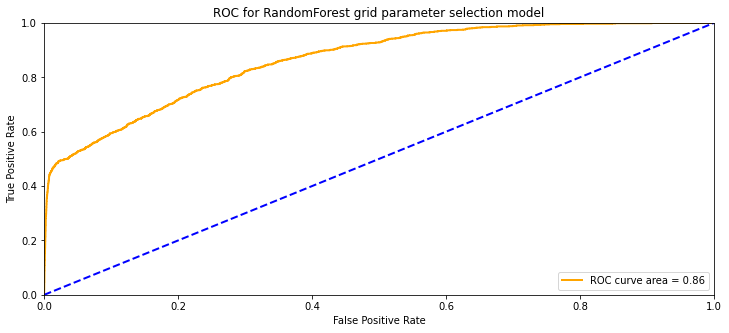

In [61]:
y_score_grid = grid.predict_proba(x_test)

plot_roc_curve(y_test, y_score_grid, "RandomForest grid parameter selection")


### LASSO + grid

In [62]:
rfc_grid_lasso = RandomForestClassifier(
    n_estimators=2000, max_depth=15, n_jobs=8, random_state=RANDOM_SEED, verbose=1
)
rfc_grid_lasso.fit(x_train_lasso, y_train_lasso)
y_score_rfc_grid_lasso = rfc_grid_lasso.predict_proba(x_test_lasso)
predictions_grid_lasso = rfc_grid_lasso.predict(x_test_lasso)
print(classification_report(y_test_lasso,predictions_grid_lasso))


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.0s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.4s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    4.7s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    7.8s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:   12.1s
[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:   13.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.8s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 2000 

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     13885
           1       0.71      0.36      0.48      1115

    accuracy                           0.94     15000
   macro avg       0.83      0.68      0.72     15000
weighted avg       0.93      0.94      0.93     15000



[Parallel(n_jobs=8)]: Done 2000 out of 2000 | elapsed:    2.2s finished


0.8312501957947327


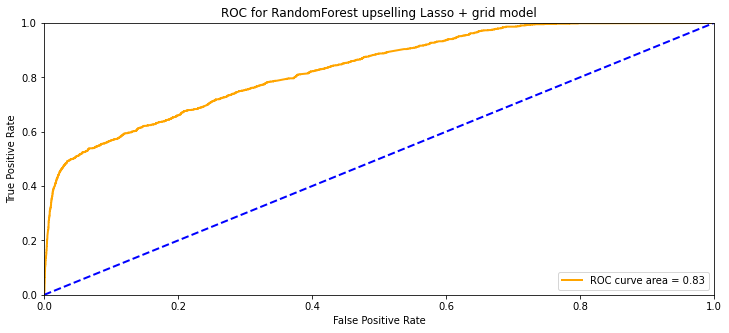

In [63]:
plot_roc_curve(y_test_lasso, y_score_rfc_grid_lasso, "RandomForest upselling Lasso + grid")


### upselling Recursive Feature Elimination

In [74]:
from sklearn.feature_selection import RFE

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    4.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    4.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    4.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      |

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.9s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    4.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    3.1s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    4.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    4.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    4.5s f

0.8651121076233184


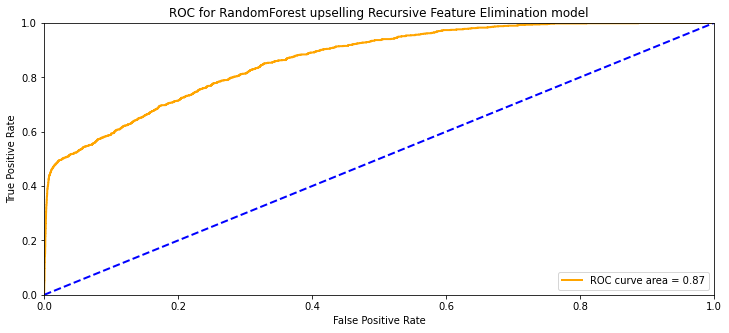

In [75]:
rfc_upselling2 = RandomForestClassifier(
    n_estimators=2100, max_depth=9, n_jobs=8, random_state=RANDOM_SEED, verbose=1
)

rfe_up = RFE(estimator=rfc_upselling2, n_features_to_select=20)  

rfe_up.fit(x_train, y_train)

selected_features = rfe_up.support_
selected_indices = np.where(selected_features)[0]
x_train_u_selected = x_train.iloc[:, selected_indices]
x_test_u_selected = x_test.iloc[:, selected_indices]

rfc_u_rfe = RandomForestClassifier(
    n_estimators=2100, max_depth=9, n_jobs=8, random_state=RANDOM_SEED, verbose=1
)

rfc_u_rfe.fit(x_train_u_selected, y_train)

y_score_rfc_up = rfc_u_rfe.predict_proba(x_test_u_selected)
plot_roc_curve(y_test, y_score_rfc_up, "RandomForest upselling Recursive Feature Elimination")

In [97]:
x_train_u_selected[:0]

,Var6,Var28,Var38,Var57,Var73,Var76,Var81,Var94,Var113,Var119,Var126,Var133,Var134,Var153,Var192_f_encoded,Var202_f_encoded,Var204_f_encoded,Var211_f_encoded,Var216_f_encoded,Var217_f_encoded


# SPLIT CHURN 

In [102]:
x_train_churn, x_test_churn, y_train_churn, y_test_churn = train_test_split(
    train_final_2, churn, test_size=0.3, random_state=RANDOM_SEED
)


In [103]:
print(x_train_churn.shape)
print(x_test_churn.shape)
print(y_test_churn.shape)


(35000, 74)
(15000, 74)
(15000,)


### churn rfc

In [104]:
rfc_churn = RandomForestClassifier(
    n_estimators=2100, max_depth=9, n_jobs=8, random_state=RANDOM_SEED, verbose=1
)


In [105]:
rfc_churn.fit(x_train_churn, y_train_churn)


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    3.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    7.3s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   13.5s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:   21.1s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:   31.7s
[Parallel(n_jobs=8)]: Done 2100 out of 2100 | elapsed:   36.9s finished


RandomForestClassifier(max_depth=9, n_estimators=2100, n_jobs=8,
                       random_state=1319, verbose=1)

In [106]:
y_score_rfc_churn = rfc_churn.predict_proba(x_test_churn)


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    2.1s
[Parallel(n_jobs=8)]: Done 2100 out of 2100 | elapsed:    2.5s finished


0.7215308959754531


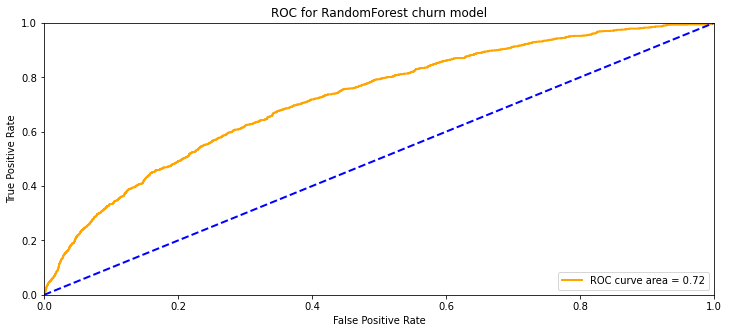

In [107]:
plot_roc_curve(y_test_churn, y_score_rfc_churn, "RandomForest churn")


### Churn lasso

In [108]:
x_train_churn_lasso, x_test_churn_lasso, y_train_churn_lasso, y_test_churn_lasso = train_test_split(
    selected_df2, churn, test_size=0.3, random_state=RANDOM_SEED
)

In [110]:
rfc_churn_lasso= RandomForestClassifier(
    n_estimators=2100, max_depth=9, n_jobs=8, random_state=RANDOM_SEED, verbose=1
)
rfc_churn_lasso.fit(x_train_churn_lasso, y_train_churn_lasso)


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    3.5s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    6.4s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:   10.2s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:   14.8s
[Parallel(n_jobs=8)]: Done 2100 out of 2100 | elapsed:   17.7s finished


RandomForestClassifier(max_depth=9, n_estimators=2100, n_jobs=8,
                       random_state=1319, verbose=1)

In [111]:
y_score_rfc_churn_lasso = rfc_churn_lasso.predict_proba(x_test_churn_lasso)


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    1.8s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 2100 out of 2100 | elapsed:    3.2s finished


0.6822872772719912


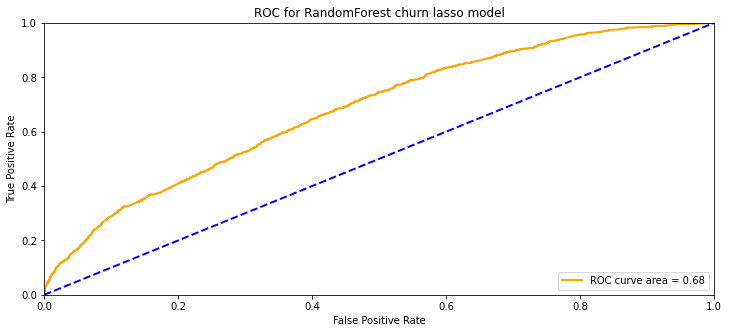

In [112]:
plot_roc_curve(y_test_churn_lasso, y_score_rfc_churn_lasso, "RandomForest churn lasso")


### churn Recursive Feature Elimination


In [113]:
x_train_churn

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var219_f_encoded,Var220_f_encoded,Var221_f_encoded,Var222_f_encoded,Var223_f_encoded,Var225_f_encoded,Var226_f_encoded,Var227_f_encoded,Var228_f_encoded,Var229_f_encoded
43366,0.005738,0.05,0.000101,0.003860,0.003860,0.000000,0.001823,0.070272,0.000000,0.240350,...,0.80608,0.00234,0.74018,0.00234,0.73216,0.20858,0.04216,0.70312,0.65406,0.23378
24000,0.042873,0.05,0.021145,0.004301,0.004301,0.004049,0.005468,0.065128,0.000000,0.393012,...,0.80608,0.00090,0.74018,0.00090,0.73216,0.22144,0.02148,0.70312,0.02532,0.56864
18029,0.000053,0.10,0.018214,0.007058,0.007058,0.000000,0.000608,0.044674,0.000000,0.001468,...,0.80608,0.08882,0.74018,0.08882,0.73216,0.20858,0.05228,0.12306,0.02484,0.19608
39400,0.001541,0.00,0.000000,0.007609,0.007609,0.000000,0.017011,0.067715,0.000000,0.390185,...,0.80608,0.00038,0.74018,0.00038,0.73216,0.52288,0.04216,0.70312,0.65406,0.56864
25334,0.001594,0.10,0.007763,0.000993,0.000993,0.000000,0.001823,0.074114,0.000000,0.000000,...,0.10422,0.00048,0.74018,0.00048,0.10422,0.52288,0.16062,0.70312,0.65406,0.56864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.008819,0.00,0.005984,0.005955,0.005955,0.032389,0.006075,0.044674,0.000000,0.050310,...,0.80608,0.00938,0.03324,0.00938,0.73216,0.20858,0.04216,0.12306,0.02484,0.23378
28140,0.001275,0.00,0.000000,0.002426,0.002426,0.004049,0.002430,0.054992,0.045455,0.002278,...,0.80608,0.00088,0.74018,0.00088,0.73216,0.52288,0.02530,0.70312,0.65406,0.56864
2267,0.001116,0.00,0.000000,0.000993,0.000993,0.000000,0.000000,0.025919,0.000000,0.000000,...,0.02218,0.00094,0.06120,0.00094,0.73216,0.52288,0.09664,0.04560,0.65406,0.56864
25578,0.030654,0.00,0.000182,0.005624,0.005624,0.016194,0.013366,0.038274,0.000000,0.000141,...,0.80608,0.00456,0.12398,0.00456,0.73216,0.22144,0.02278,0.06852,0.01524,0.23378


In [115]:
rfc_churn2 = RandomForestClassifier(
    n_estimators=100, max_depth=7, n_jobs=8, random_state=RANDOM_SEED, verbose=1
)

rfe = RFE(estimator=rfc_churn2, n_features_to_select=20)  

rfe.fit(x_train_churn, y_train_churn)

selected_features = rfe.support_
selected_indices = np.where(selected_features)[0]
x_train_selected = x_train_churn.iloc[:, selected_indices]
x_test_selected = x_test_churn.iloc[:, selected_indices]

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.4s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_job

[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    1.2s finished
[Parallel(n_jobs=8)]: Usi

In [116]:
x_train_selected

,Var6,Var13,Var21,Var28,Var57,Var73,Var74,Var81,Var113,Var125,Var126,Var140,Var189,Var192_f_encoded,Var199_f_encoded,Var202_f_encoded,Var212_f_encoded,Var217_f_encoded,Var218_f_encoded,Var226_f_encoded
43366,0.005738,0.000101,0.003860,0.070272,0.898675,0.323077,0.000098,0.126070,0.501483,0.000046,0.080000,0.000115,0.443396,0.00240,0.00082,0.00128,0.58606,0.00128,0.47956,0.04216
24000,0.042873,0.021145,0.004301,0.065128,0.273271,0.592308,0.002167,0.007309,0.503832,0.010149,0.314461,0.001902,0.415318,0.00674,0.00224,0.00046,0.01402,0.00006,0.47956,0.02148
18029,0.000053,0.018214,0.007058,0.044674,0.410059,0.661538,0.005072,0.002769,0.495274,0.005480,0.314461,0.001498,0.415094,0.00512,0.00012,0.00020,0.12866,0.00020,0.47956,0.05228
39400,0.001541,0.000000,0.007609,0.067715,0.161265,0.046154,0.000000,0.077669,0.499003,0.000000,0.360000,0.000000,0.415318,0.00646,0.00380,0.00022,0.58606,0.00022,0.50638,0.04216
25334,0.001594,0.007763,0.000993,0.074114,0.663737,0.153846,0.000000,0.005232,0.493302,0.002674,0.360000,0.001105,0.330189,0.00232,0.00524,0.00204,0.58606,0.00200,0.47956,0.16062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.008819,0.005984,0.005955,0.044674,0.530397,0.546154,0.000000,0.048020,0.483336,0.005271,0.314461,0.000000,0.292453,0.00240,0.00138,0.00020,0.01092,0.00018,0.47956,0.04216
28140,0.001275,0.000000,0.002426,0.054992,0.510132,0.038462,0.000000,0.002101,0.480375,0.000000,0.220000,0.000000,0.415318,0.00386,0.00532,0.00014,0.58606,0.00014,0.50638,0.02530
2267,0.001116,0.000000,0.000993,0.025919,0.410029,0.092308,0.000000,0.000828,0.496649,0.000000,0.020000,0.000000,0.415318,0.00382,0.00934,0.00014,0.05984,0.00008,0.50638,0.09664
25578,0.030654,0.000182,0.005624,0.038274,0.909144,0.215385,0.000000,0.009879,0.497727,0.000568,0.680000,0.000000,0.471698,0.00752,0.00214,0.00006,0.02870,0.00002,0.50638,0.02278


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    6.9s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:   12.2s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:   18.4s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:   26.0s
[Parallel(n_jobs=8)]: Done 2100 out of 2100 | elapsed:   30.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:    2.8s


0.7299603393521933


[Parallel(n_jobs=8)]: Done 2100 out of 2100 | elapsed:    3.3s finished


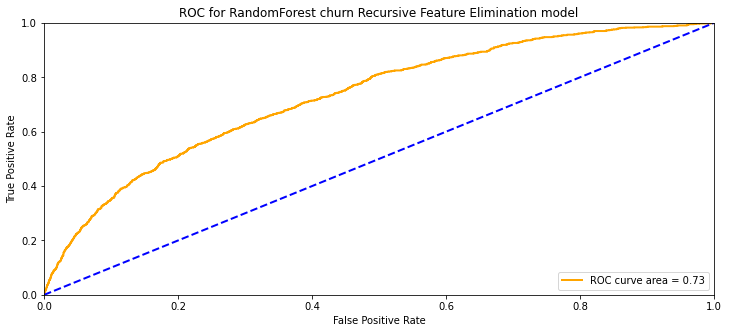

In [117]:
rfc_churn_rfe = RandomForestClassifier(
    n_estimators=2100, max_depth=9, n_jobs=8, random_state=RANDOM_SEED, verbose=1
)

rfc_churn_rfe.fit(x_train_selected, y_train_churn)

y_score_rfc_churn2 = rfc_churn_rfe.predict_proba(x_test_selected)
plot_roc_curve(y_test_churn, y_score_rfc_churn2, "RandomForest churn Recursive Feature Elimination")
